# Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.


## 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("glass.xlsx", sheet_name="glass")

In [3]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(213, 10)

In [11]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

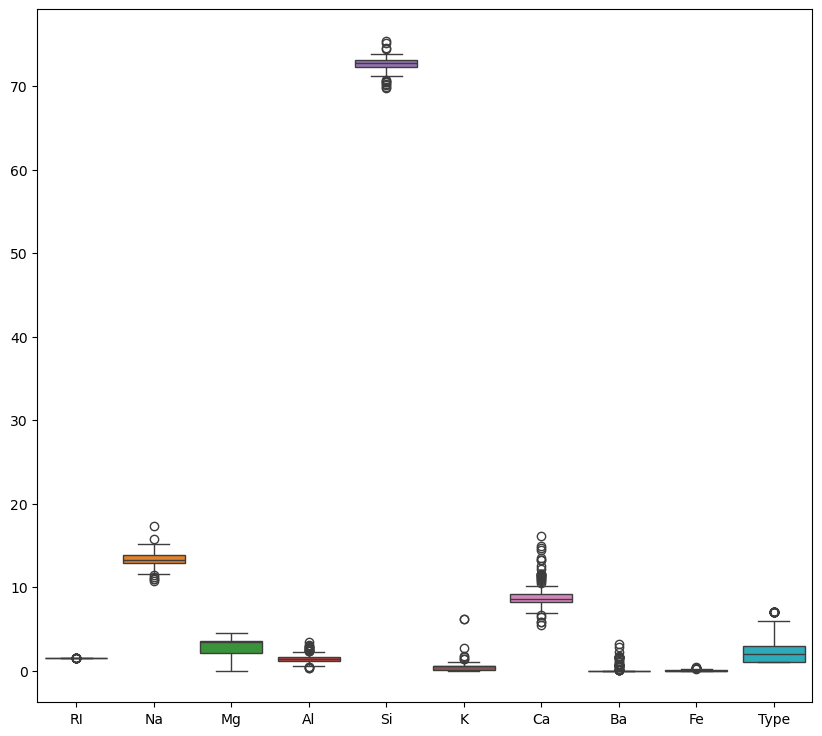

In [12]:
plt.figure(figsize = (10,9))
sns.boxplot(df)
plt.show()


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
outliers = (df< (Q1 - 1.5*IQR))| (df > (Q3 + 1.5*IQR))
outliers.sum()

RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
Type    29
dtype: int64

 ## Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.



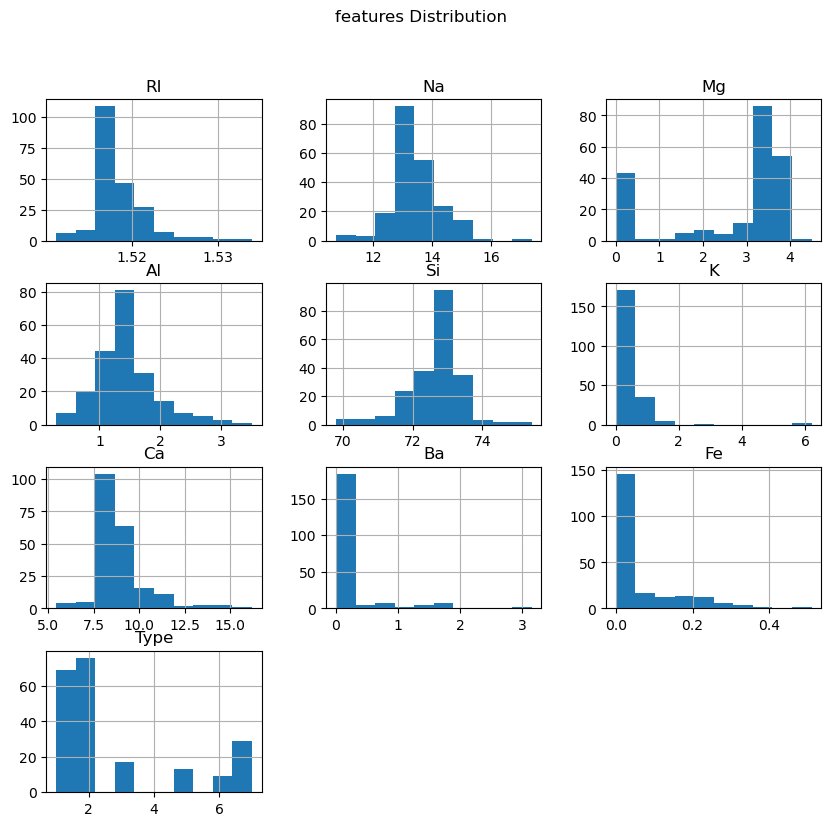

In [14]:
df.hist(bins = 10,figsize = (10,9))
plt.suptitle("features Distribution")
plt.show()

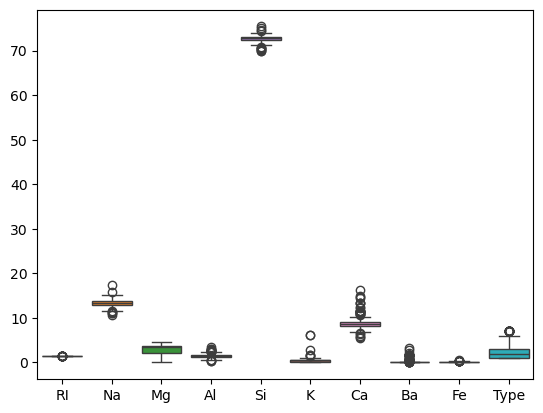

In [15]:
sns.boxplot(df)
plt.show()

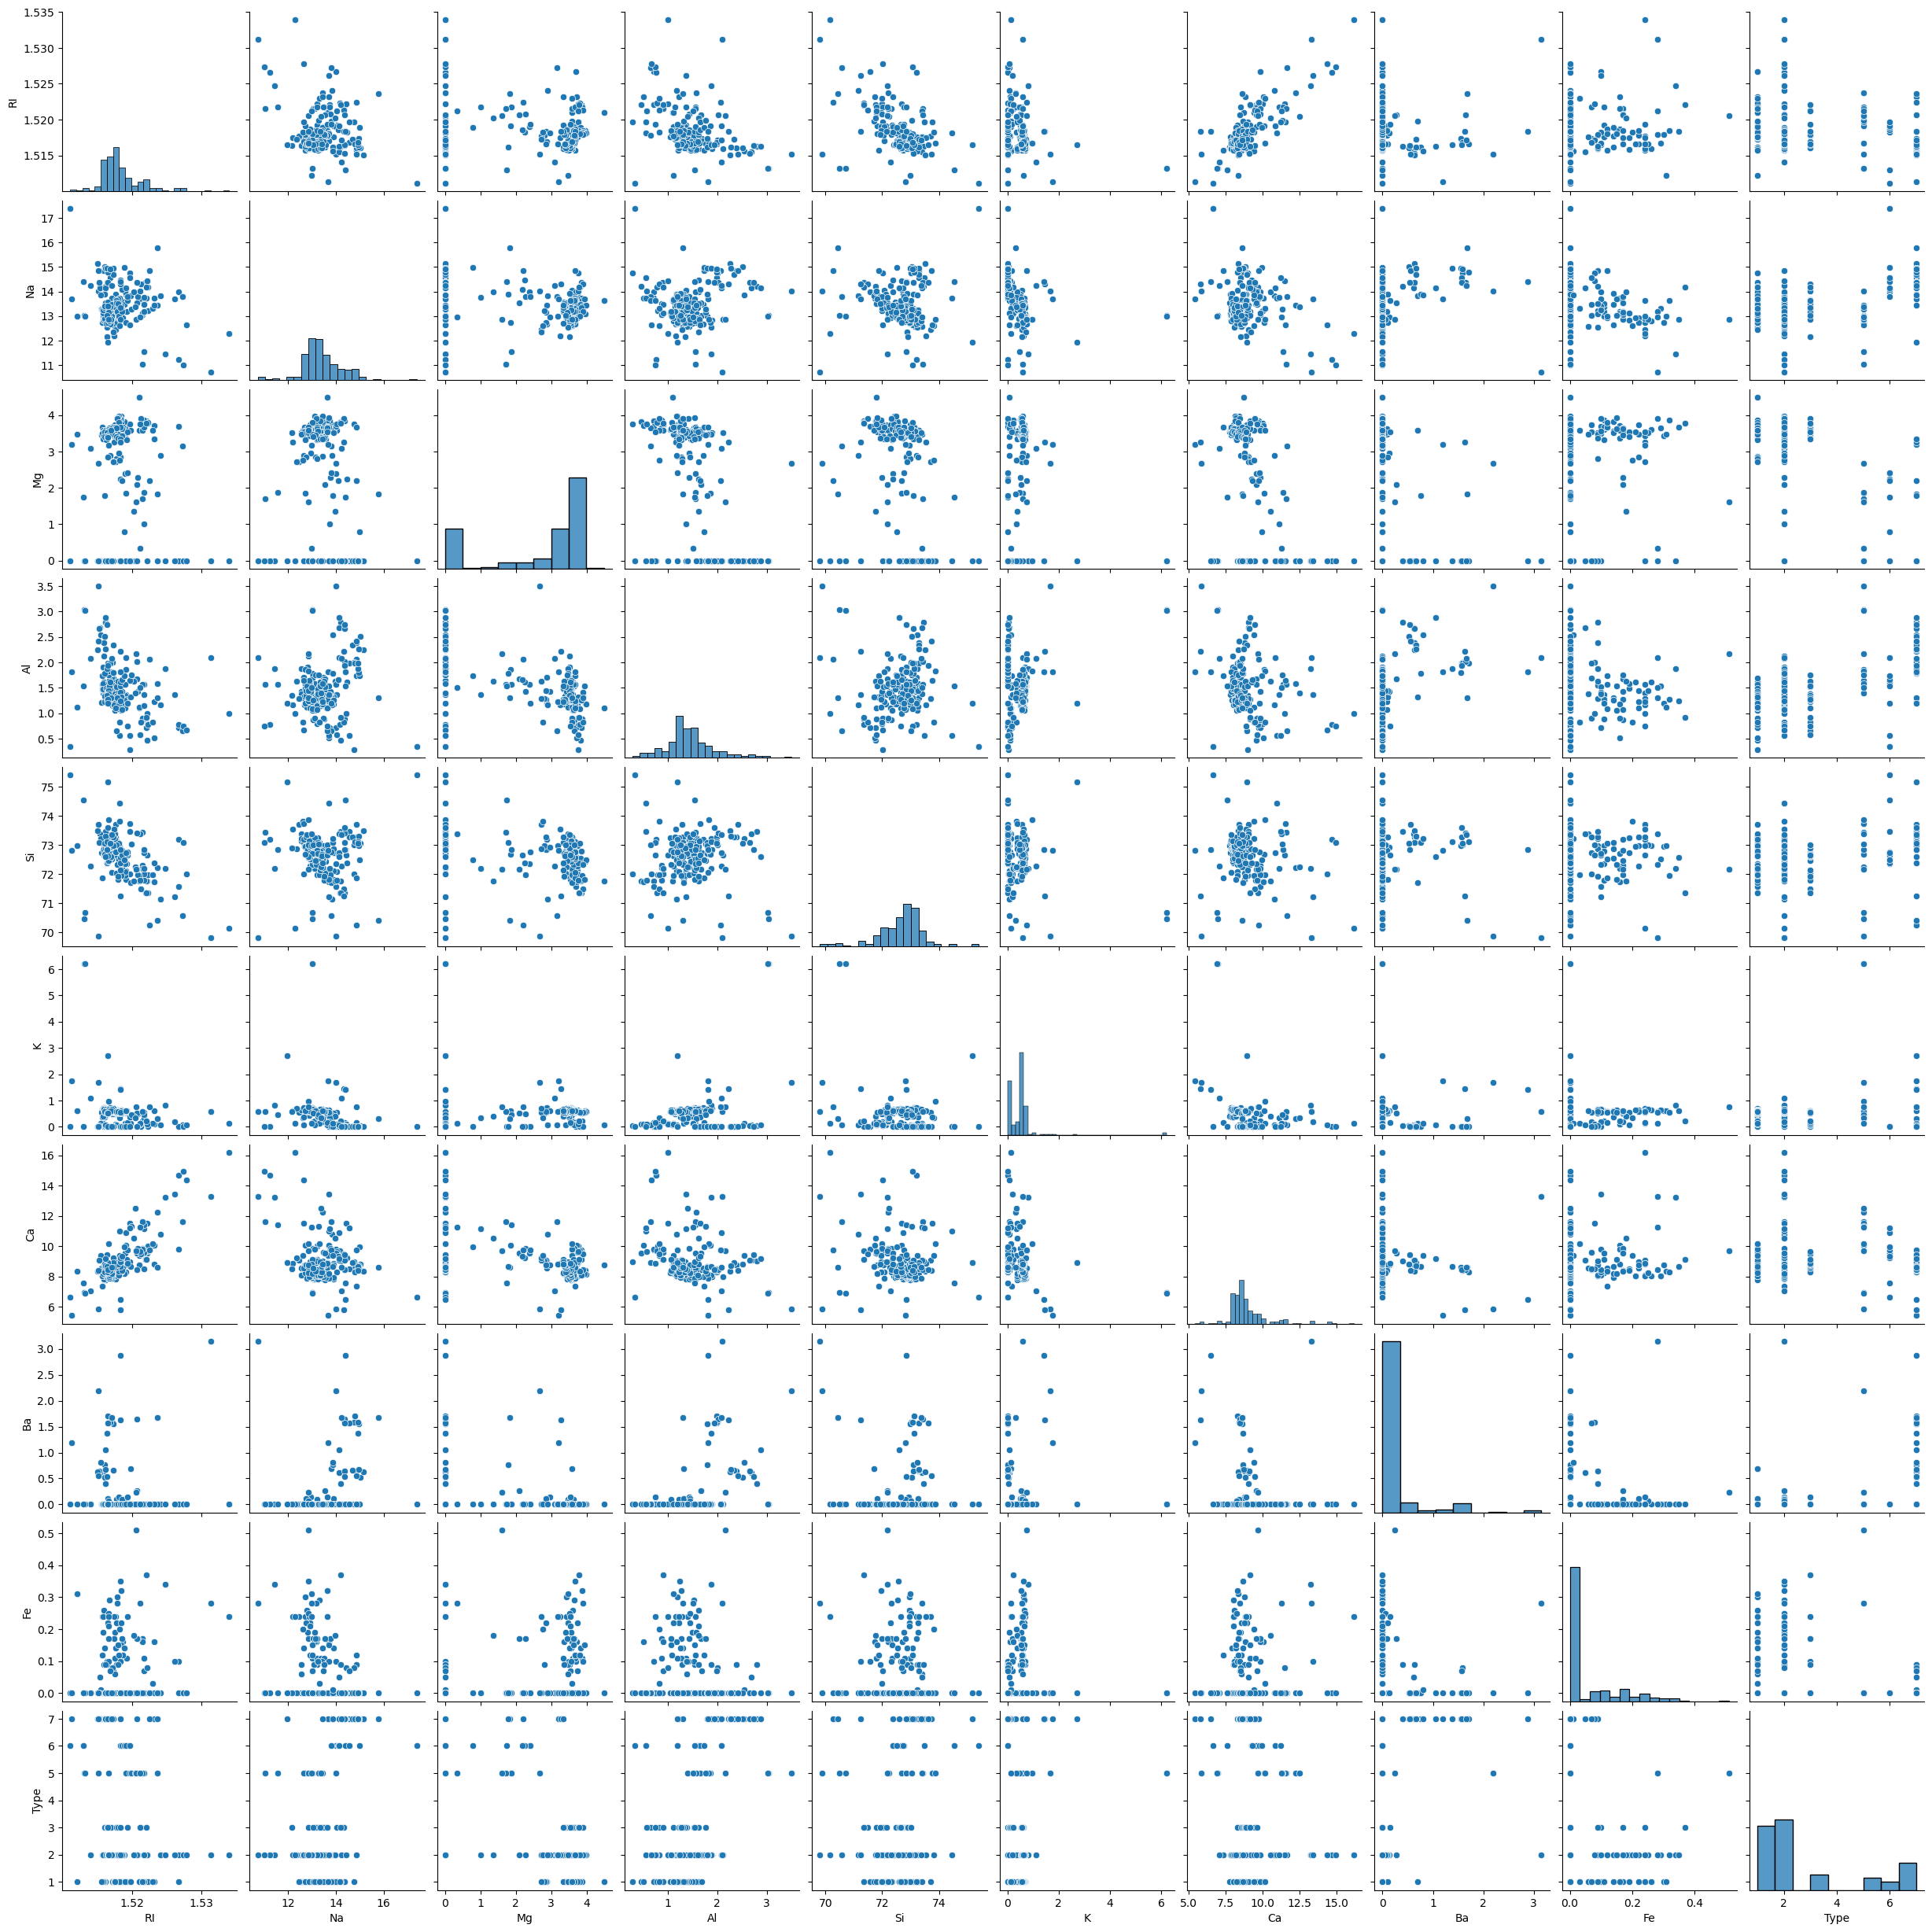

In [16]:
sns.pairplot(df)
plt.show()

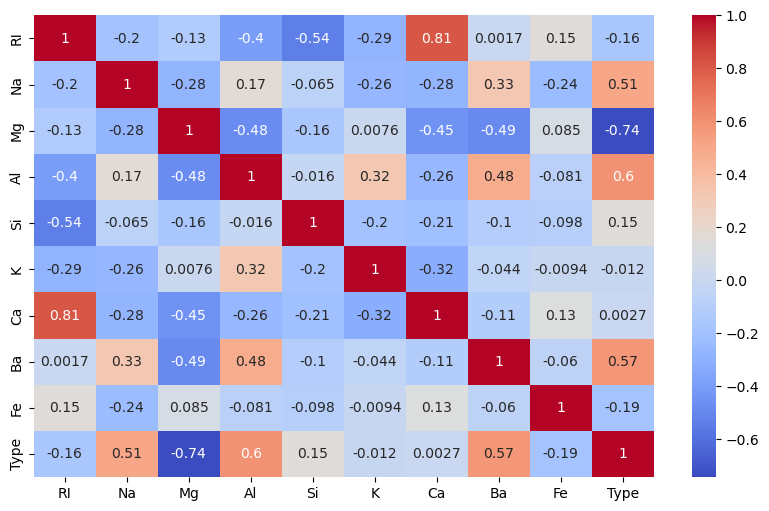

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True ,cmap= "coolwarm")
plt.show()

## 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


 "The dataset was checked for missing values, and none were found. Hence, no imputation or removal was required."
 
 The dataset does not contain categorical variables; hence, no encoding was required

In [19]:
# Scaling 

from sklearn.preprocessing import StandardScaler

X = df.drop("Type", axis=1)   # features
y = df["Type"]                # target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
y.value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [27]:
X_scaled

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

## 4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y , test_size = 0.2, random_state = 42, stratify = y)


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state= 42, class_weight= "balanced")
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
y_pred = rf.predict(X_test)
y_pred

array([7, 5, 2, 5, 1, 2, 2, 2, 1, 1, 3, 1, 7, 6, 1, 7, 7, 1, 1, 5, 2, 1,
       7, 2, 1, 3, 2, 6, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 6],
      dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average="weighted"))
print("Recall (weighted):", recall_score(y_test, y_pred, average="weighted"))
print("F1-Score (weighted):", f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.80      0.80      0.80        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.84        43
   macro avg       0.88      0.86      0.86        43
weighted avg       0.85      0.84      0.84        43


Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 2 12  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
Precision (weighted): 0.8496124031007751
Recall (weighted): 0.8372093023255814
F1-Score (weighted): 0.8381570314208645


In [39]:
X.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

## 5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.



In [53]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 100, random_state=42)
bagging.fit(X_train,y_train)

y_pred_bag= bagging.predict(X_test)

In [54]:
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nBagging Classification Report:\n", classification_report(y_test, y_pred_bag))
print("\nBagging Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))

Bagging Accuracy: 0.7906976744186046

Bagging Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.79      0.81      0.79        43
weighted avg       0.80      0.79      0.79        43


Bagging Confusion Matrix:
 [[11  2  0  0  0  1]
 [ 2 11  0  1  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [82]:
#Boosting Adaboost
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier( estimator = DecisionTreeClassifier(max_depth = 5), n_estimators = 100, learning_rate = 1, random_state = 42)
boosting.fit(X_train, y_train)
y_pred_boost= boosting.predict(X_test)



In [83]:
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))
print("\nBoosting Classification Report:\n", classification_report(y_test, y_pred_boost))
print("\nBoosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_boost))

Boosting Accuracy: 0.8604651162790697

Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.80      0.80      0.80        15
           3       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.86        43
   macro avg       0.89      0.87      0.87        43
weighted avg       0.87      0.86      0.86        43


Boosting Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 2 12  0  0  1  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


##  Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.


## Answer:

We applied Random Forest, Bagging, and Boosting on the Glass dataset. Boosting gave the highest accuracy (~86%), Random Forest was close (~84%), and Bagging was slightly lower (~79%). Bagging reduces variance by averaging independent trees, while Boosting reduces bias by focusing on misclassified samples. Random Forest combines bagging with feature randomness, giving robust and balanced performance